# Intro

Exploratory data analysis (EDA) of calls to Israel's emergency medical services (EMS), Magen David Adom's (MDA), that describe psychiatric cases.

Data:

The data contains details on emergency missions that were coded as psychiatric, from 01/01/2019 to 31/01/2022. It contains  information from both dispatch logs and medical reports made by responding emergency medical techinicians (EMTs). The raw data includes date and time; type of psychiatric emergency, urgency of mission and responding unit level (basic / advanced life support); age and sex. Cases of patient death were also included. The data encompasses both adult (age >= 18) and pediatric cases.  

Defenitions:
1. A mission is defined as an assignment to a responding EMS unit (or units) and not the actual phone call that was made to the dispatch. Often several phone calls are made for the same mission. Furthermore, some missions involve treating several patients (although in the dispatch log it would appear as if only one patient was in need of help).
2. Psychiatric missions are considered one of the following: alcohol, drug or medication overdose; suicidal ideation or attempt; hanging (considered a distinct category); a restless, anxious or psychotic patient   

The aims of this analysis are as follows:
1. Explore the data according to common practices to idnetify patterns.
2. Clean and process the data according to common practices for future model building. 
3. Visualize the data and generate reports for presentation. 

My guidelines for proper analysis were obtained from:
1. https://python.plainenglish.io/begin-at-the-beginning-a-quick-guide-to-eda-packages-7a7d65d0a499
2. https://medium.com/analytics-vidhya/how-to-summarize-data-with-pandas-2c9edffafbaf#3677
3. https://blog.devgenius.io/my-3-favourite-eda-packages-in-python-d6935ad8af7c
4. https://medium.com/analytics-vidhya/pandas-profiling-5ecd0b977ecd

# Imports

In [273]:
import pandas as pd
import constants as cnts
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from IPython.display import display

# Load data

In [272]:
%%time
data_path = cnts.raw_mda_psych_data_path
df0 = pd.read_excel(data_path)
df.head()

CPU times: total: 27.8 s
Wall time: 27.9 s


,date,doy,wave,time,urgency,vehicle,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,...,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,sex.male,sex.female,sex.other,datetime
0,2019-01-01,1,pre-covid,19:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1,0,0,2019-01-01 19:00:00
1,2019-01-01,1,pre-covid,17:00:00,urgent - bls,bls,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,49.0,1,0,0,2019-01-01 17:00:00
2,2019-01-01,1,pre-covid,03:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.1,0,1,0,2019-01-01 03:00:00
3,2019-01-01,1,pre-covid,00:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,33.9,1,0,0,2019-01-01 00:00:00
4,2019-01-01,1,pre-covid,19:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,38.4,1,0,0,2019-01-01 19:00:00


# Overview

In [5]:
display(df.info())
display(df.describe())
display(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196053 entries, 0 to 196052
Data columns (total 21 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   date                                  196053 non-null  datetime64[ns]
 1   doy                                   196053 non-null  int64         
 2   wave                                  196053 non-null  object        
 3   time                                  196053 non-null  object        
 4   urgency                               196053 non-null  object        
 5   vehicle                               196053 non-null  object        
 6   medical.team.death                    54655 non-null   float64       
 7   medical.team.restless.patient         7748 non-null    float64       
 8   medical.team.psychiatric.disturbance  18476 non-null   float64       
 9   medical.team.psychosis                6980 non-null    floa

None

,doy,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,sex.male,sex.female,sex.other
count,196053.000000,54655.0,7748.0,18476.0,6980.0,12082.0,42504.0,7114.0,36403.0,9337.0,13330.0,592.0,184481.000000,196053.000000,196053.000000,196053.000000
mean,685.736189,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,49.777424,0.543496,0.450062,0.006442
std,379.376128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.700910,0.498106,0.497501,0.080004
min,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000
25%,360.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.100000,0.000000,0.000000,0.000000
50%,705.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,46.100000,1.000000,0.000000,0.000000
75%,1017.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70.200000,1.000000,1.000000,0.000000
max,1308.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,115.200000,1.000000,1.000000,1.000000


date                                    1308
doy                                     1308
wave                                      12
time                                      24
urgency                                    3
vehicle                                    2
medical.team.death                         1
medical.team.restless.patient              1
medical.team.psychiatric.disturbance       1
medical.team.psychosis                     1
medical.team.suicidal.attempt              1
medical.team.anxiety                       1
medical.team.suicidal.ideations            1
medical.team.overdose.alcohol              1
medical.team.overdose.drug                 1
medical.team.overdose.medication           1
medical.team.hanging                       1
age                                     1792
sex.male                                   2
sex.female                                 2
sex.other                                  2
dtype: int64

In [331]:
df=df0.copy()

emer_list=list(df.columns)[6:17] # All emergency types documented in the data
waves=df['wave'].unique() # waves as assigned by MDA BI team
ndays=df[['wave', 'date']].groupby('wave').nunique().loc[waves] # number of days in each wave peroid

#df['time'] = df['time'] + '.0'
df['datetime'] = pd.to_datetime(df['date'].astype('str') + ' ' + df['time'])
df['age.group'] = df.apply(lambda x: 'pediatric' if x['age'] < 18 else 'adult', axis = 1)
df['sex'] = df.apply(lambda x: 'female' if x['sex.female'] == 1 else ("male" if x['sex.male'] == 1 else "other"), axis=1)
df.drop(['sex.male', 'sex.female', 'sex.other', 'date', 'time'], axis = 1, inplace=True)
df[emer_list] = df[emer_list].fillna(value = 0)
df = df.dropna(axis = 0)

display(df)
display(df.info())
display(df.loc[:, ~df.columns.isin(emer_list)].describe())
display(df.nunique())
display(df[emer_list].sum())

,doy,wave,urgency,vehicle,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,datetime,age.group,sex
1,1,pre-covid,urgent - bls,bls,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.00,2019-01-01 17:00:00,adult,male
2,1,pre-covid,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21.10,2019-01-01 03:00:00,adult,female
3,1,pre-covid,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,33.90,2019-01-01 00:00:00,adult,male
4,1,pre-covid,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38.40,2019-01-01 19:00:00,adult,male
6,1,pre-covid,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.90,2019-01-01 03:00:00,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196048,1308,w6,als,als,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60.80,2022-07-31 19:00:00,adult,female
196049,1308,w6,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.10,2022-07-31 13:00:00,adult,female
196050,1308,w6,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.65,2022-07-31 23:00:00,adult,female
196051,1308,w6,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.00,2022-07-31 05:00:00,adult,male


<class 'pandas.core.frame.DataFrame'>
Int64Index: 184481 entries, 1 to 196052
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   doy                                   184481 non-null  int64         
 1   wave                                  184481 non-null  object        
 2   urgency                               184481 non-null  object        
 3   vehicle                               184481 non-null  object        
 4   medical.team.death                    184481 non-null  float64       
 5   medical.team.restless.patient         184481 non-null  float64       
 6   medical.team.psychiatric.disturbance  184481 non-null  float64       
 7   medical.team.psychosis                184481 non-null  float64       
 8   medical.team.suicidal.attempt         184481 non-null  float64       
 9   medical.team.anxiety                  184481 non-null  floa

None

,doy,age
count,184481.000000,184481.000000
mean,688.957513,49.777424
std,378.925905,24.700910
min,1.000000,1.000000
25%,364.000000,28.100000
50%,711.000000,46.100000
75%,1020.000000,70.200000
max,1308.000000,115.200000


doy                                      1308
wave                                       12
urgency                                     3
vehicle                                     2
medical.team.death                          2
medical.team.restless.patient               2
medical.team.psychiatric.disturbance        2
medical.team.psychosis                      2
medical.team.suicidal.attempt               2
medical.team.anxiety                        2
medical.team.suicidal.ideations             2
medical.team.overdose.alcohol               2
medical.team.overdose.drug                  2
medical.team.overdose.medication            2
medical.team.hanging                        2
age                                      1792
datetime                                31068
age.group                                   2
sex                                         3
dtype: int64

medical.team.death                      52020.0
medical.team.restless.patient            7109.0
medical.team.psychiatric.disturbance    17810.0
medical.team.psychosis                   6762.0
medical.team.suicidal.attempt           11787.0
medical.team.anxiety                    41964.0
medical.team.suicidal.ideations          7002.0
medical.team.overdose.alcohol           30791.0
medical.team.overdose.drug               8091.0
medical.team.overdose.medication        13112.0
medical.team.hanging                      534.0
dtype: float64

# Univariate analysis and visualization
## Age (pediatric cases)

In [126]:
display(df[df['age.group'] == 'pediatric'].loc[:, ~df.columns.isin(emer_list)].describe())
display(df[df['age.group'] == 'pediatric'][emer_list].sum())

,doy,age,sex.male,sex.female,sex.other
count,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000
mean,689.708375,14.263561,0.429606,0.547306,0.023087
std,384.912718,3.793753,0.495042,0.497780,0.150188
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,342.000000,13.600000,0.000000,0.000000,0.000000
50%,731.000000,15.300000,0.000000,1.000000,0.000000
75%,1026.000000,16.800000,1.000000,1.000000,0.000000
max,1308.000000,17.900000,1.000000,1.000000,1.000000


medical.team.death                       506.0
medical.team.restless.patient            614.0
medical.team.psychiatric.disturbance     703.0
medical.team.psychosis                   448.0
medical.team.suicidal.attempt           1024.0
medical.team.anxiety                    3598.0
medical.team.suicidal.ideations          357.0
medical.team.overdose.alcohol           2995.0
medical.team.overdose.drug               287.0
medical.team.overdose.medication        1238.0
medical.team.hanging                      15.0
dtype: float64

([<matplotlib.axis.XTick at 0x1b43a3552d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

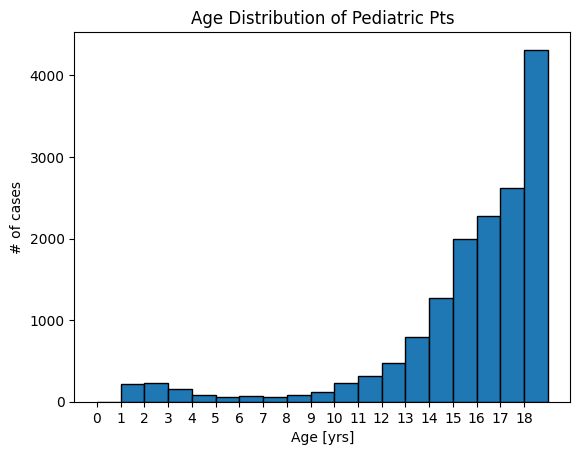

In [7]:
plt.hist(df['age'], bins=19, range=(0,19), align='mid', edgecolor='black')
plt.xlabel('Age [yrs]')
plt.ylabel('# of cases')
plt.title('Age Distribution of Pediatric Pts')
plt.xticks(range(0,19,1))

## Age (adult cases)

In [127]:
display(df[df['age.group'] == 'adult'].loc[:, ~df.columns.isin(emer_list)].describe())
display(df[df['age.group'] == 'adult'][emer_list].sum())

,doy,age,sex.male,sex.female,sex.other
count,185008.000000,173436.000000,185008.000000,185008.000000,185008.000000
mean,685.499049,52.039069,0.550295,0.444256,0.005448
std,379.042773,23.720010,0.497465,0.496884,0.073612
min,1.000000,18.000000,0.000000,0.000000,0.000000
25%,361.000000,31.100000,0.000000,0.000000,0.000000
50%,704.000000,48.100000,1.000000,0.000000,0.000000
75%,1016.000000,72.100000,1.000000,1.000000,0.000000
max,1308.000000,115.200000,1.000000,1.000000,1.000000


medical.team.death                      54149.0
medical.team.restless.patient            7134.0
medical.team.psychiatric.disturbance    17773.0
medical.team.psychosis                   6532.0
medical.team.suicidal.attempt           11058.0
medical.team.anxiety                    38906.0
medical.team.suicidal.ideations          6757.0
medical.team.overdose.alcohol           33408.0
medical.team.overdose.drug               9050.0
medical.team.overdose.medication        12092.0
medical.team.hanging                      577.0
dtype: float64

([<matplotlib.axis.XTick at 0x1b43f4001c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

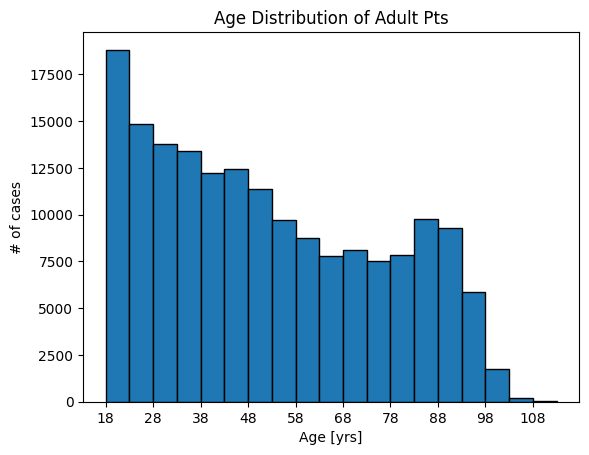

In [9]:
plt.hist(df['age'], bins=range(18,118,5), log=False, align='mid', edgecolor='black')
plt.xlabel('Age [yrs]')
plt.ylabel('# of cases')
plt.title('Age Distribution of Adult Pts')
plt.xticks(range(18,118,10))

## Responding vehicle

count     196053
unique         2
top          bls
freq       99161
Name: vehicle, dtype: object

,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging
vehicle,,,,,,,,,,,
als,52736.0,4402.0,4238.0,3311.0,3664.0,13900.0,1226.0,8776.0,4252.0,5090.0,551.0
bls,1919.0,3346.0,14238.0,3669.0,8418.0,28604.0,5888.0,27627.0,5085.0,8240.0,41.0


<AxesSubplot:>

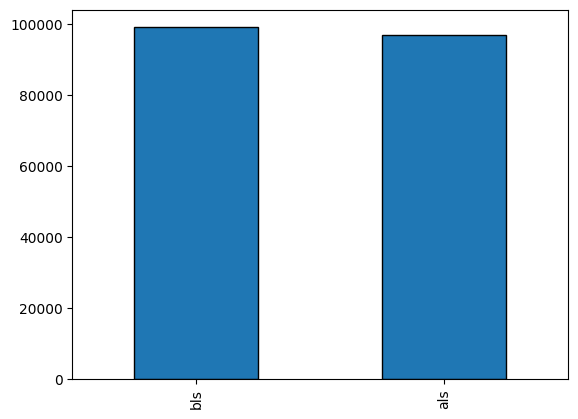

In [154]:
display(df['vehicle'].describe())
display(df.groupby('vehicle')[emer_list].sum())
df['vehicle'].value_counts().plot(kind = 'bar', edgecolor='black')

## Urgency of call

count     196053
unique         3
top          als
freq       97204
Name: urgency, dtype: object

,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging
urgency,,,,,,,,,,,
als,53222.0,4589.0,4118.0,3532.0,3145.0,15847.0,874.0,7331.0,4403.0,4550.0,571.0
non-urgent bls,430.0,673.0,6845.0,1007.0,557.0,6423.0,1676.0,1679.0,395.0,544.0,3.0
urgent - bls,1003.0,2486.0,7513.0,2441.0,8380.0,20234.0,4564.0,27393.0,4539.0,8236.0,18.0


<AxesSubplot:>

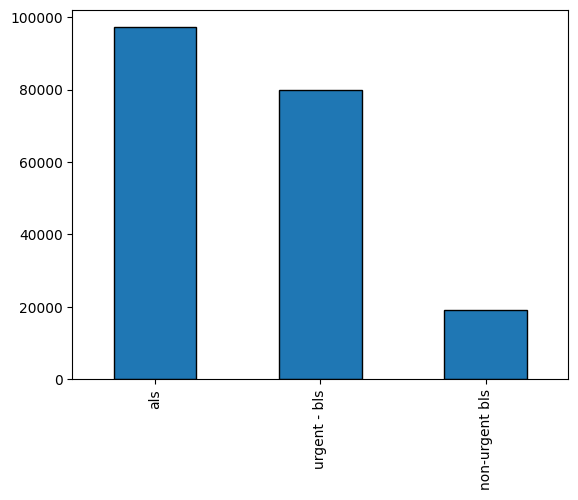

In [155]:
display(df['urgency'].describe())
display(df.groupby('urgency')[emer_list].sum())
df['urgency'].value_counts().plot(kind = 'bar', edgecolor='black')

ADD CONCLUSIONS

## Wave

In [157]:
display(df['wave'].describe())
display(df.groupby('wave')[emer_list].sum().loc[waves])

count        196053
unique           12
top       pre-covid
freq          61334
Name: wave, dtype: object

,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging
wave,,,,,,,,,,,
pre-covid,17059.0,2390.0,5396.0,2072.0,3656.0,12254.0,2000.0,12931.0,3197.0,4273.0,200.0
w1,1942.0,299.0,696.0,256.0,366.0,1463.0,222.0,811.0,276.0,371.0,13.0
b1-2,2383.0,333.0,824.0,286.0,554.0,1785.0,320.0,1458.0,371.0,622.0,35.0
w2,5002.0,741.0,1674.0,651.0,1115.0,3742.0,645.0,2777.0,871.0,1174.0,54.0
b2-3,1195.0,180.0,358.0,155.0,269.0,825.0,156.0,637.0,169.0,277.0,23.0
w3,5338.0,770.0,1553.0,615.0,967.0,3539.0,622.0,2596.0,739.0,1071.0,39.0
b3-4,4861.0,772.0,1871.0,769.0,1296.0,4730.0,792.0,3999.0,1027.0,1435.0,57.0
w4,3607.0,525.0,1374.0,477.0,911.0,3289.0,481.0,2547.0,667.0,1006.0,40.0
b4-5,3485.0,466.0,1121.0,425.0,711.0,2811.0,457.0,2233.0,501.0,843.0,31.0


In [ ]:
df1 = df.groupby('wave').count().loc[waves]
df1['ndays'] = df[['wave', 'date']].groupby('wave').nunique().loc[waves] # number of days in each wave peroid
df1.head()

for emergency in emer_list:
    df1['ratio'] = df1[emergency] / df1['ndays']
    df1[['ratio']].plot(kind='bar', edgecolor='black')
    plt.title(emergency + ' ratio vs. wave')
    

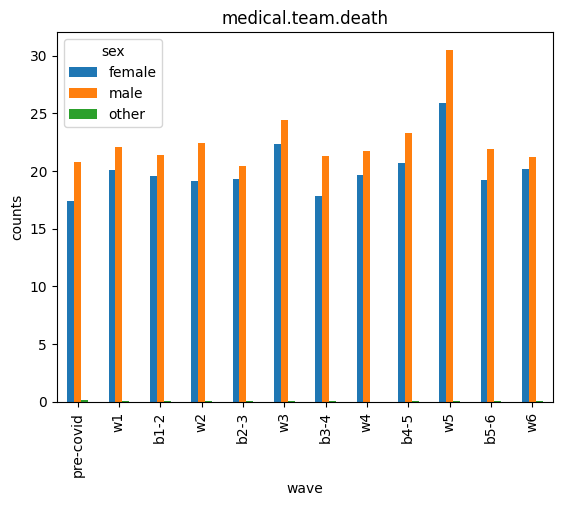

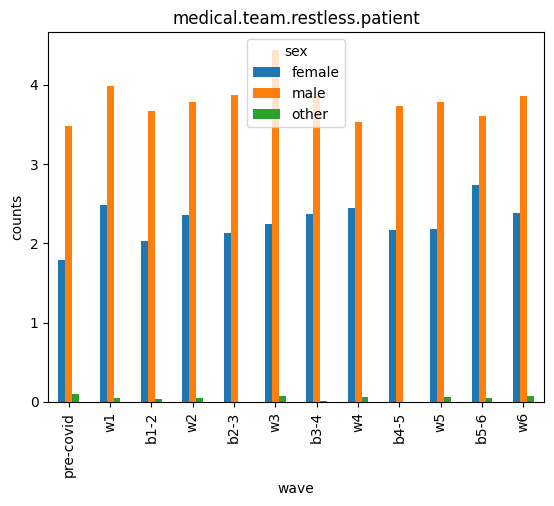

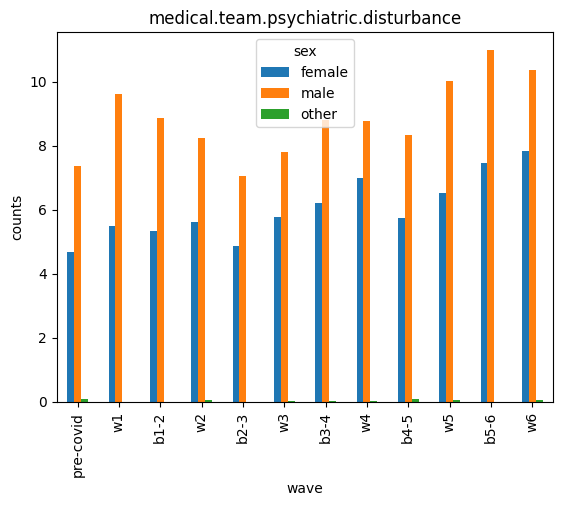

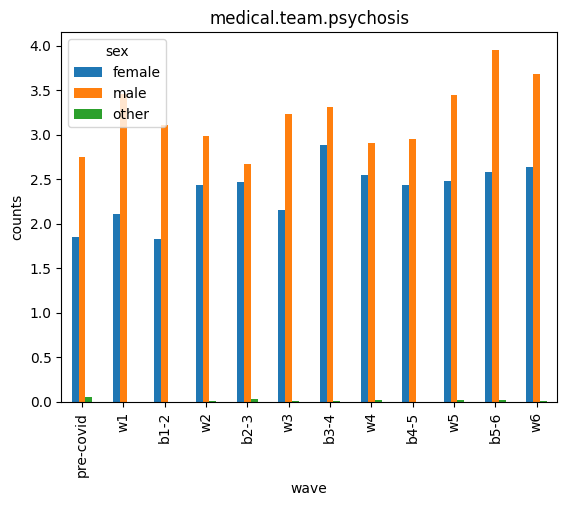

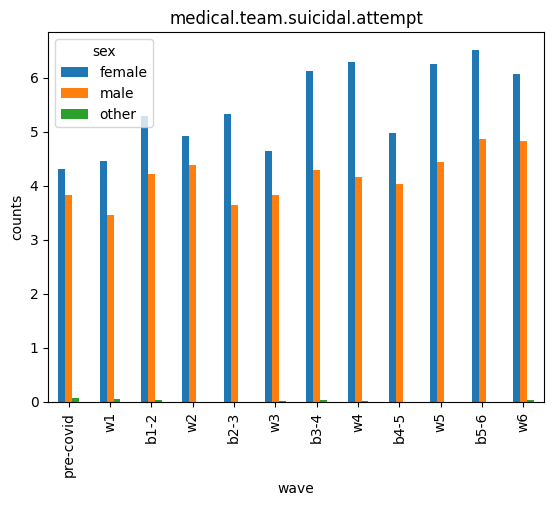

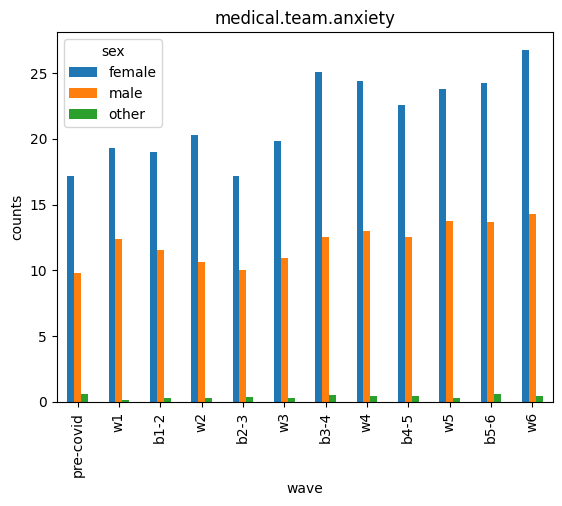

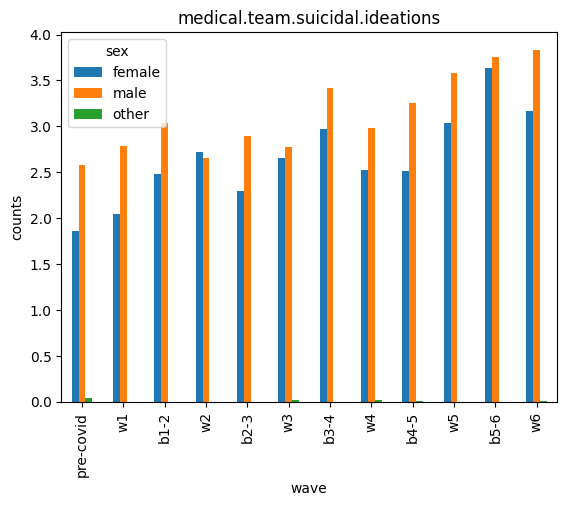

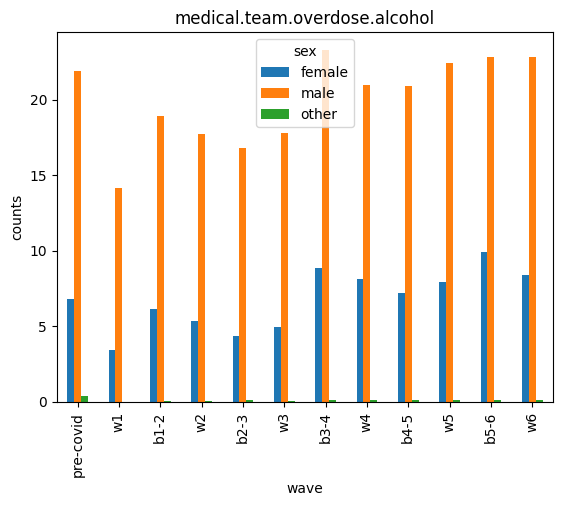

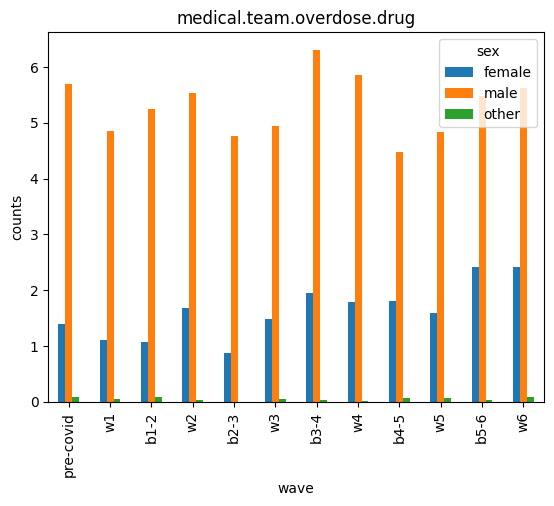

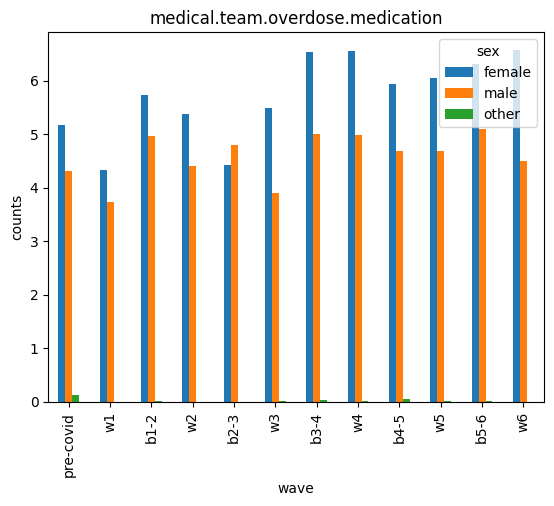

In [54]:
for emergency in emer_list:
    
    df2 = df.copy()
    df2 = df2[['wave', emergency, 'sex.male', 'sex.female', 'sex.other']]
    df2['sex'] = df2.apply(lambda x: 'female' if x['sex.female'] == 1 else ('male' if x['sex.male'] == 1 else "other"), axis=1)
    df2 = df2[['wave', emergency, 'sex']]
    df2[emergency].fillna(0, inplace=True)
    
    gb_df = df2.groupby(['wave', 'sex'])[emergency].sum().reset_index()
    
    for wave in waves:
        gb_df.loc[gb_df['wave'] == wave, 'ndays'] = int(ndays.loc[wave]) # add period days
    
    gb_df['ratio'] = gb_df[emergency] / gb_df['ndays'] # Calculate ratio of cases per days in period

    pt_df = pd.pivot_table(gb_df, values="ratio", index='wave', columns='sex', aggfunc=np.sum).reindex(index = waves)  
    pt_df.plot.bar(title = emergency, ylabel = "counts")

## Cases

medical.team.death                      54655.0
medical.team.restless.patient            7748.0
medical.team.psychiatric.disturbance    18476.0
medical.team.psychosis                   6980.0
medical.team.suicidal.attempt           12082.0
medical.team.anxiety                    42504.0
medical.team.suicidal.ideations          7114.0
medical.team.overdose.alcohol           36403.0
medical.team.overdose.drug               9337.0
medical.team.overdose.medication        13330.0
dtype: float64


<AxesSubplot:>

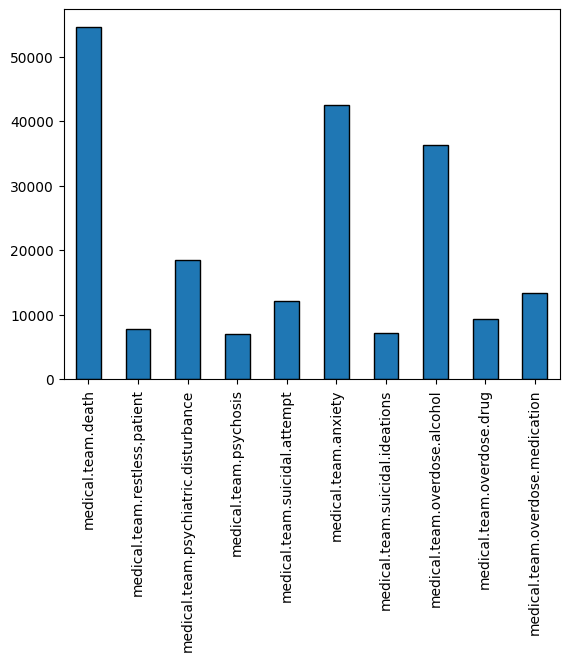

In [20]:
print(df.iloc[:,range(6,16,1)].sum())
df.iloc[:,range(6,16,1)].sum().plot(kind='bar', edgecolor='black')

## Cases w/o deaths

medical.team.restless.patient            7748.0
medical.team.psychiatric.disturbance    18476.0
medical.team.psychosis                   6980.0
medical.team.suicidal.attempt           12082.0
medical.team.anxiety                    42504.0
medical.team.suicidal.ideations          7114.0
medical.team.overdose.alcohol           36403.0
medical.team.overdose.drug               9337.0
medical.team.overdose.medication        13330.0
dtype: float64


<AxesSubplot:>

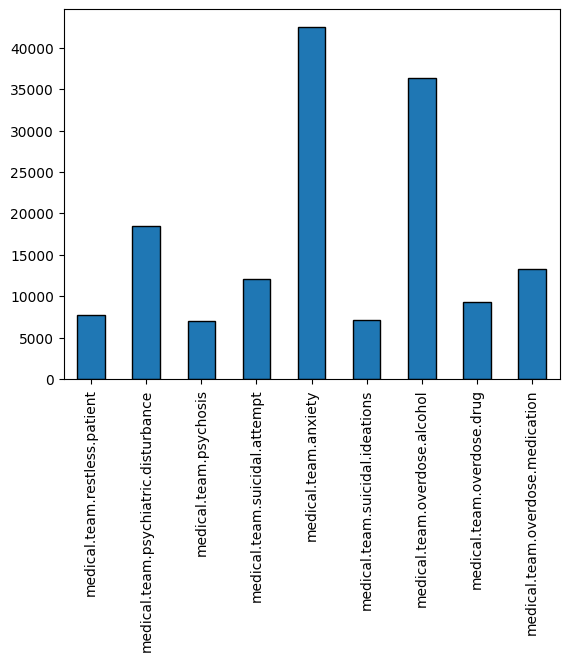

In [18]:
print(df.iloc[:,range(7,16,1)].sum())
df.iloc[:,range(7,16,1)].sum().plot(kind='bar', edgecolor='black')

## Sex

sex.male      106554
sex.female     88236
sex.other       1263
dtype: int64


<AxesSubplot:>

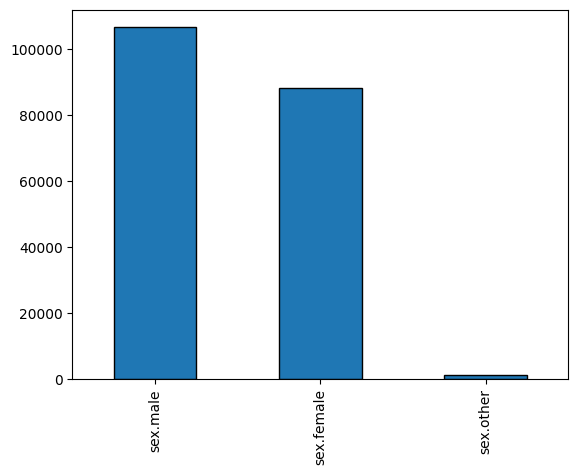

In [17]:
print(df.iloc[:,range(18,21,1)].sum())
df.iloc[:,range(18,21,1)].sum().plot(kind='bar', edgecolor='black')

## Missions with deaths

In [28]:
df_dead = df[df['medical.team.death'] == 1]
df_dead

,date,doy,wave,time,urgency,vehicle,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,...,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,sex.male,sex.female,sex.other
93,2019-01-01,1,pre-covid,09:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.0,0,1,0
97,2019-01-01,1,pre-covid,05:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.1,0,1,0
98,2019-01-01,1,pre-covid,10:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,0,1,0
100,2019-01-01,1,pre-covid,15:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,84.4,0,1,0
101,2019-01-01,1,pre-covid,13:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,58.1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196020,2022-07-31,1308,w6,13:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,93.4,0,1,0
196024,2022-07-31,1308,w6,21:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,84.1,0,1,0
196026,2022-07-31,1308,w6,17:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,1,0,0
196045,2022-07-31,1308,w6,08:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,91.1,1,0,0


Text(0.5, 1.0, 'Age distribution in cases of death')

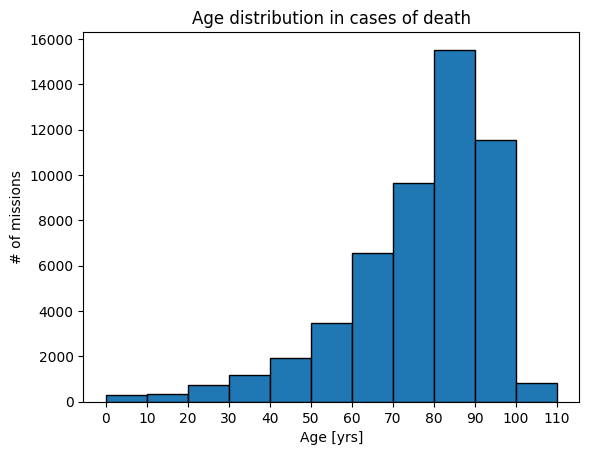

In [29]:
df_dead['age'].plot(kind = 'hist', bins=range(0,120,10), edgecolor='black')
plt.xticks(range(0,120,10))
plt.xlabel("Age [yrs]")
plt.ylabel("# of missions")
plt.title("Age distribution in cases of death")

# Bivariate analysis and visualization

<AxesSubplot:xlabel='date', ylabel='age'>

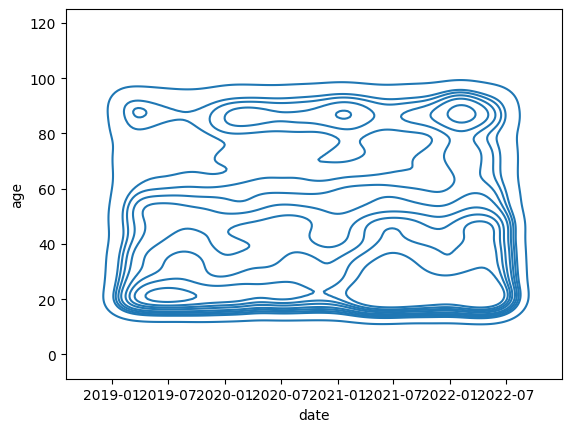

In [17]:
#df.plot(kind='scatter', y='age', x='doy', figsize=(12,7), title='Age vs. day index', s=0.1)
sns.kdeplot(data=df, x="date", y="age") #, hue="kind")
# Play aound with plotting options untill I can draw a conclusion from the data

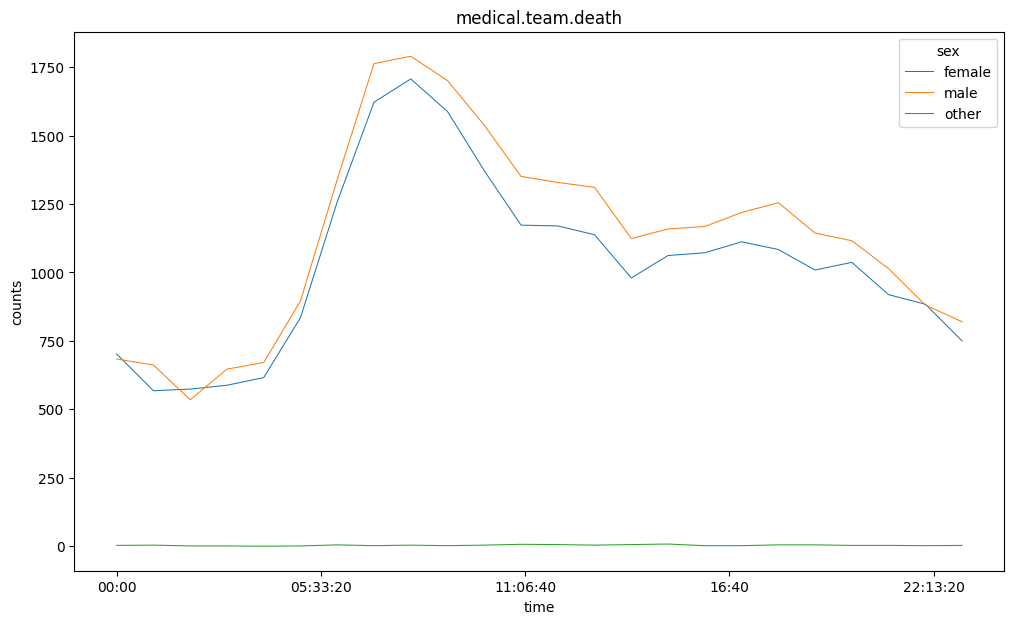

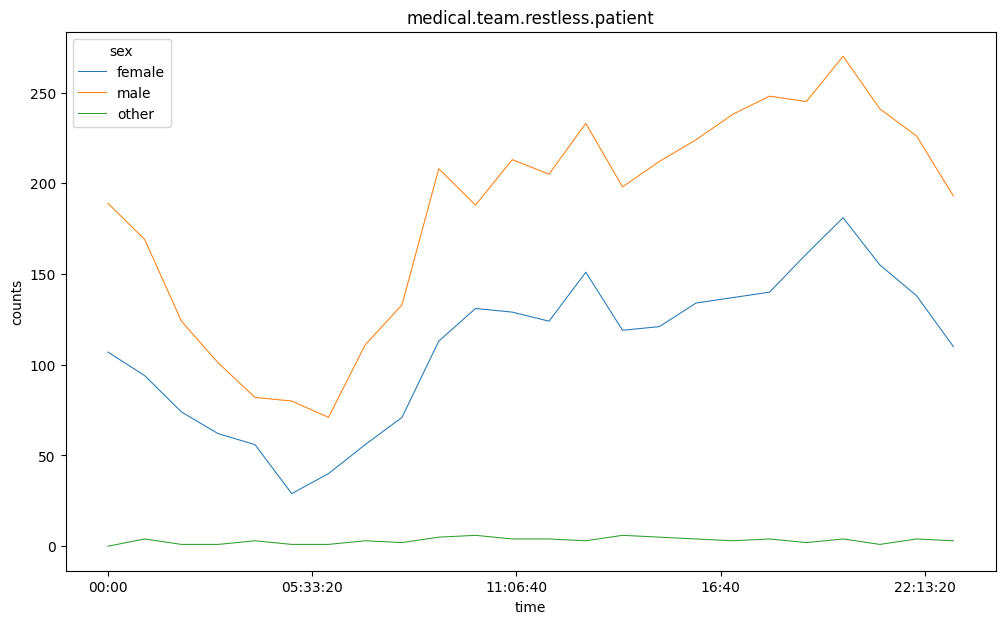

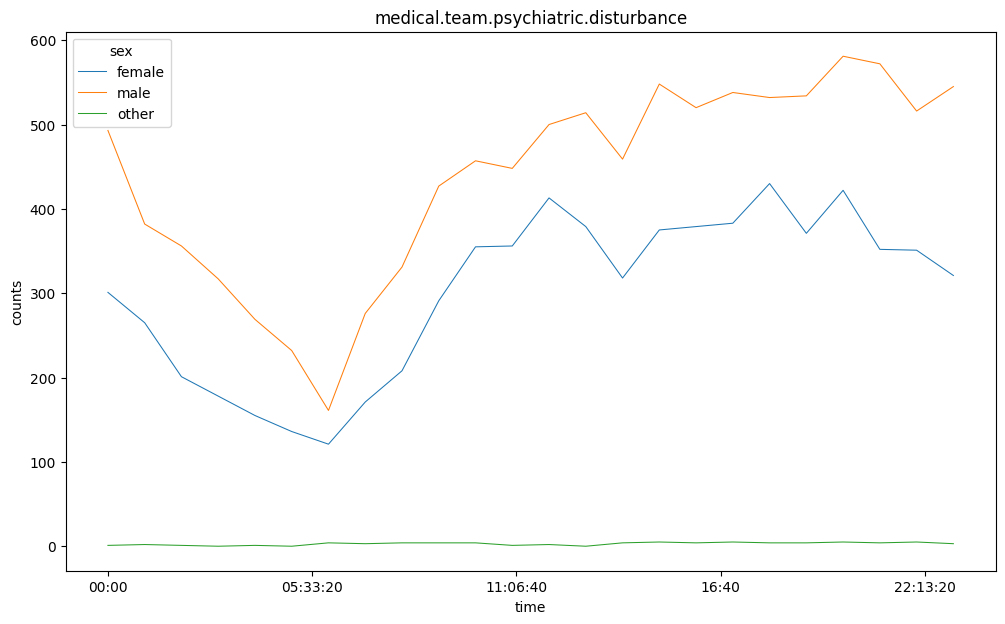

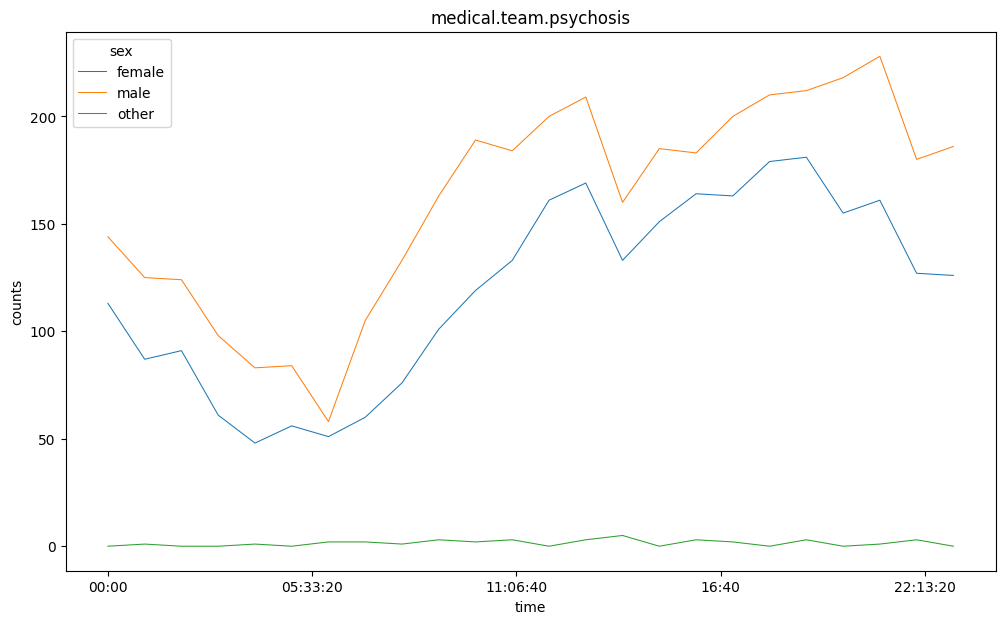

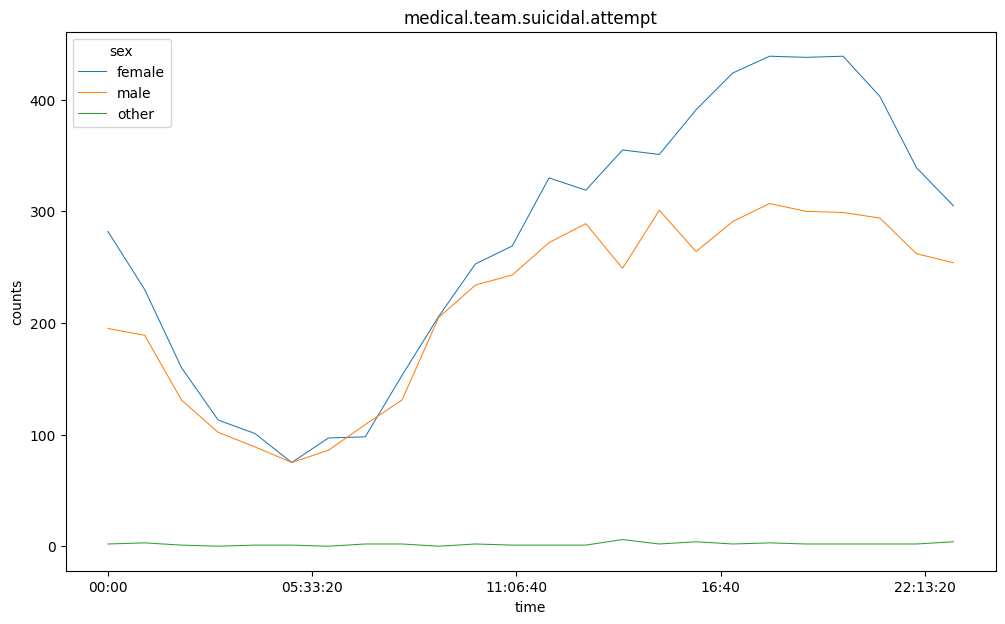

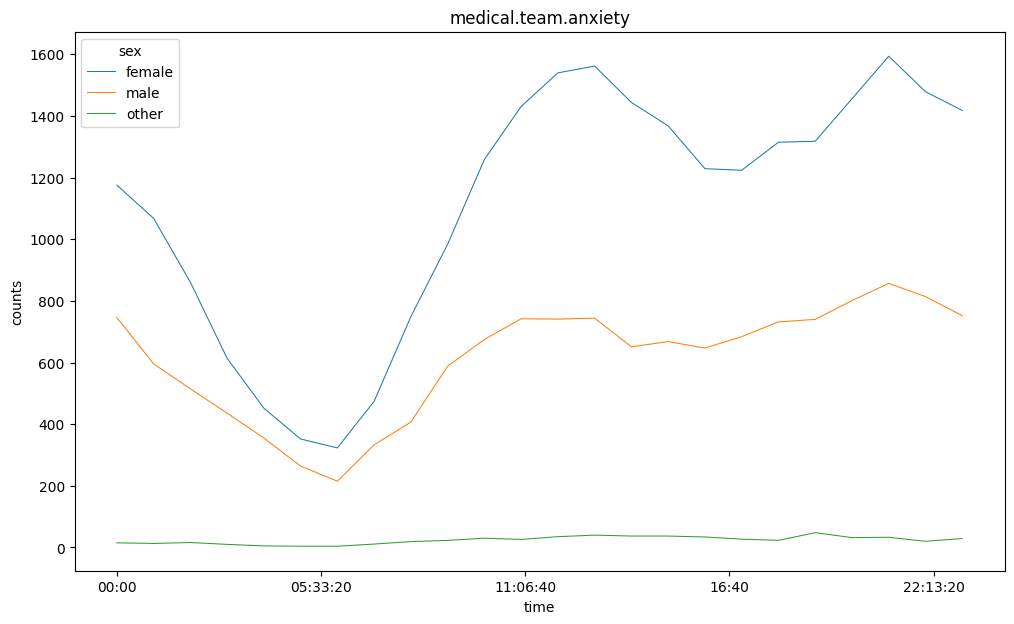

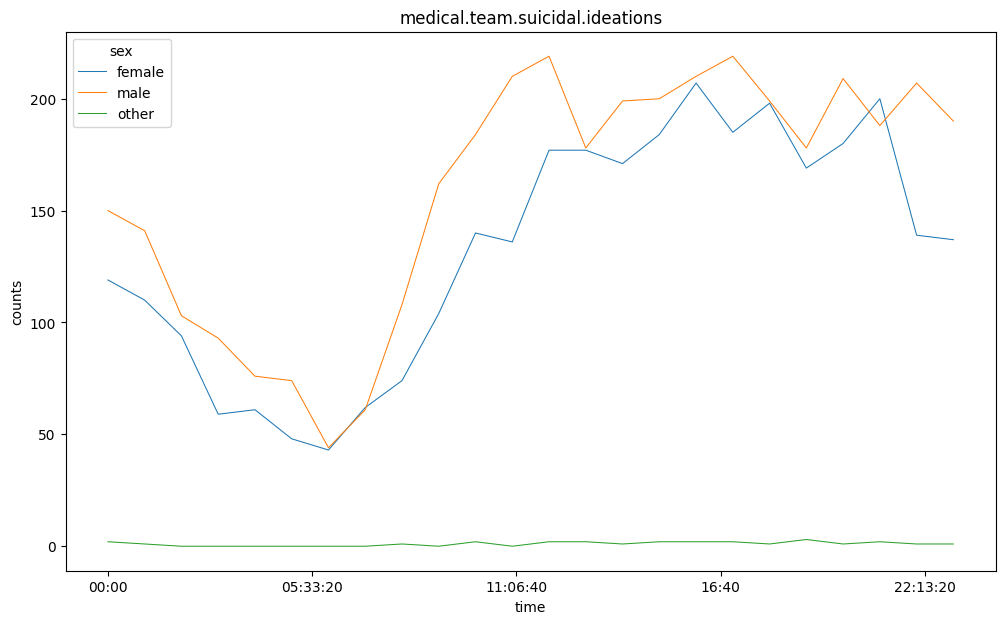

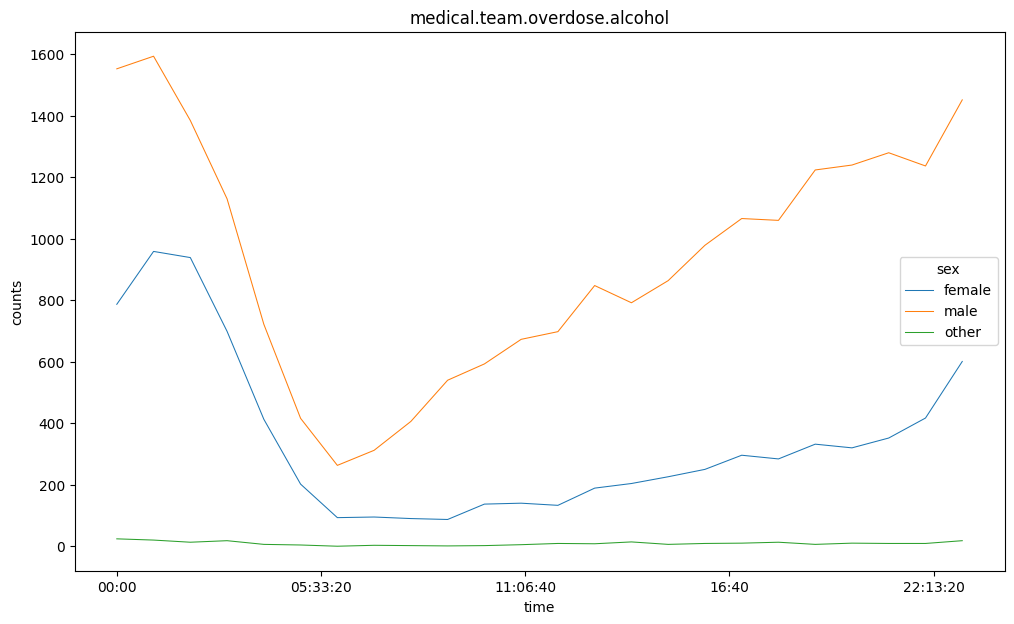

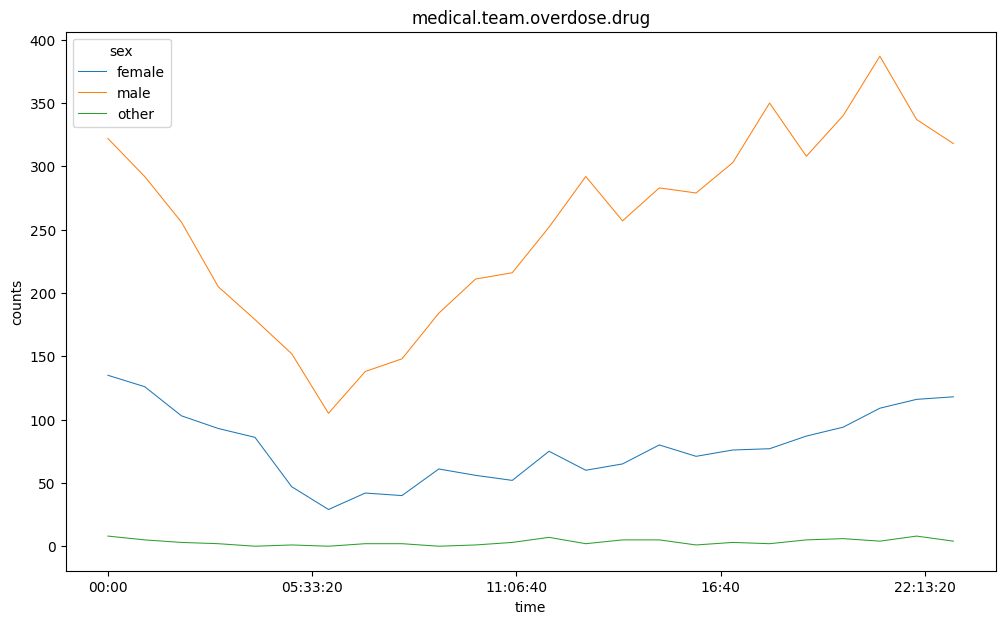

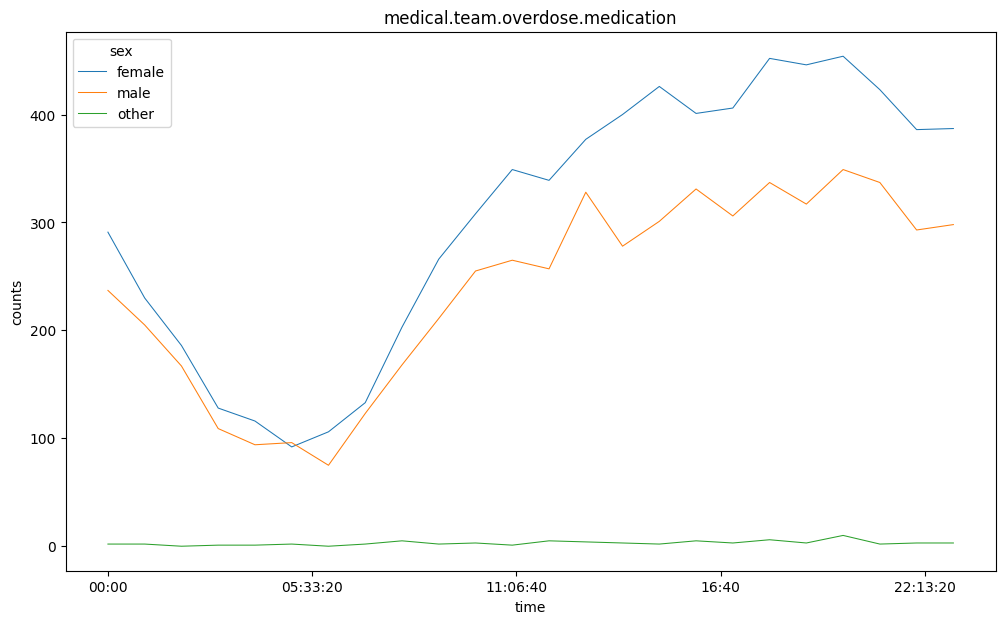

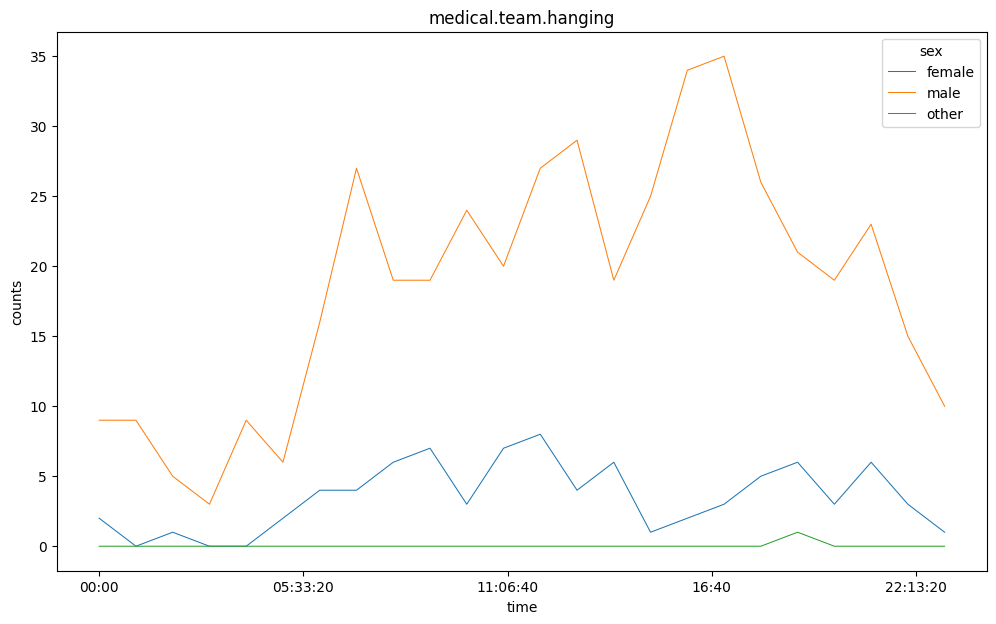

In [332]:
for emergency in emer_list:
    df1 = df[['datetime', 'sex', emergency]].copy()
    df1['time'] = df1['datetime'].apply(lambda x:x.time())
    pt_df = pd.pivot_table(df1, values=emergency, index='time', columns='sex', aggfunc=np.sum)
    pt_df.plot(linewidth=0.75, figsize=(12,7), ylabel = 'counts', title=emergency)

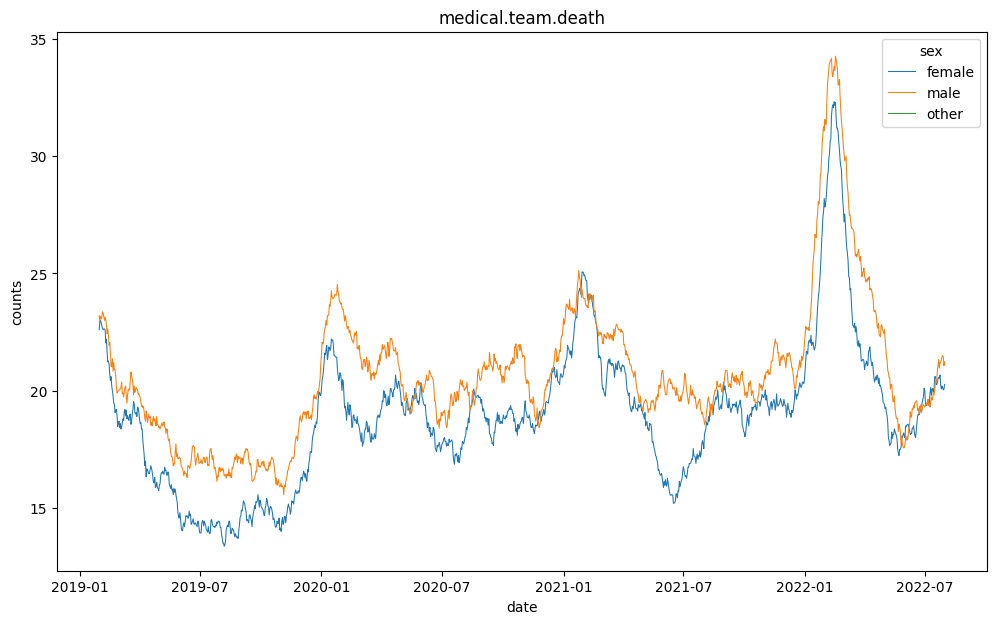

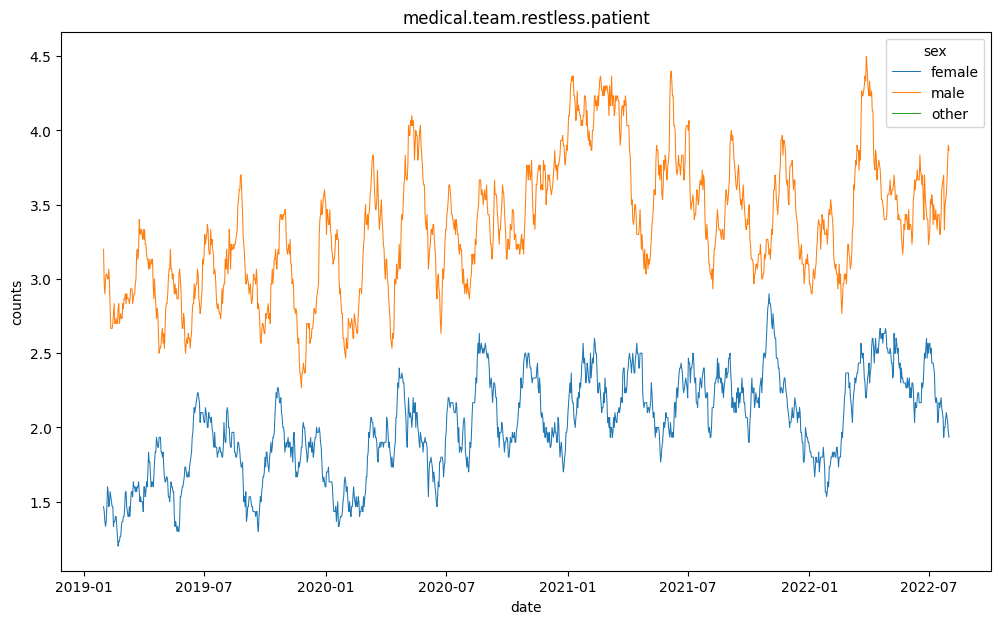

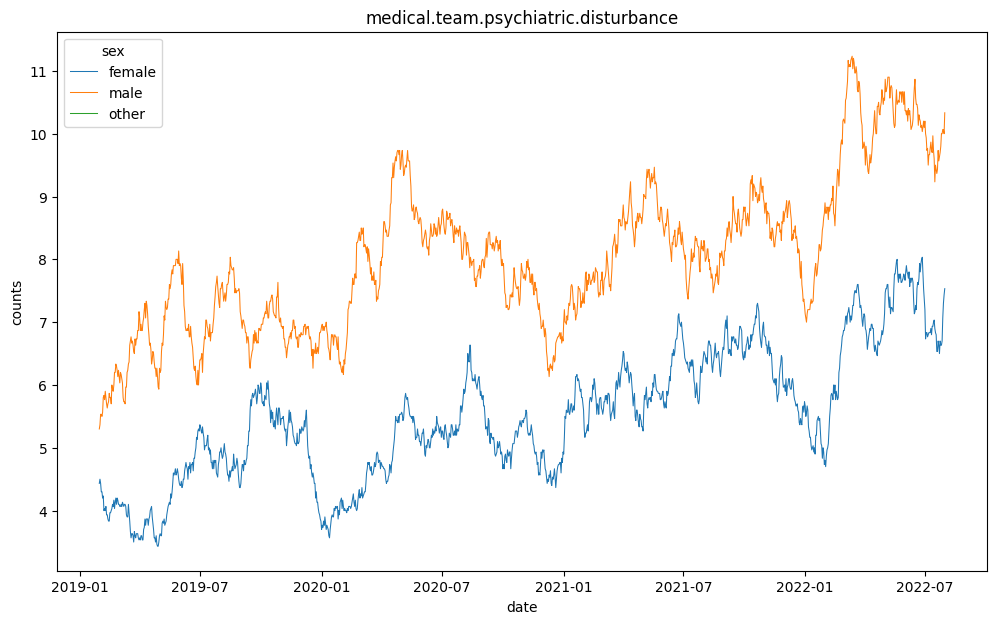

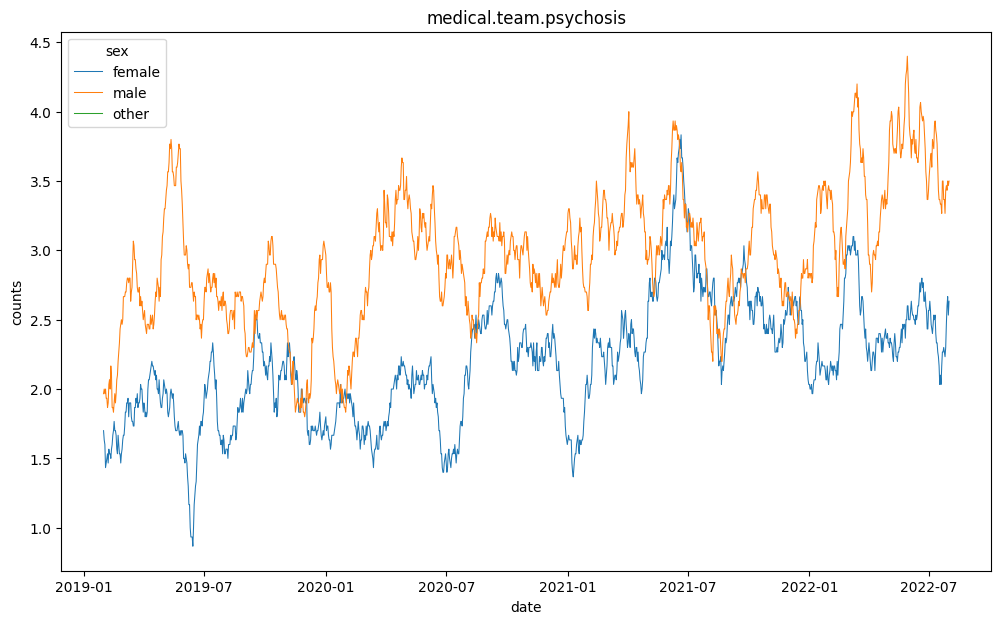

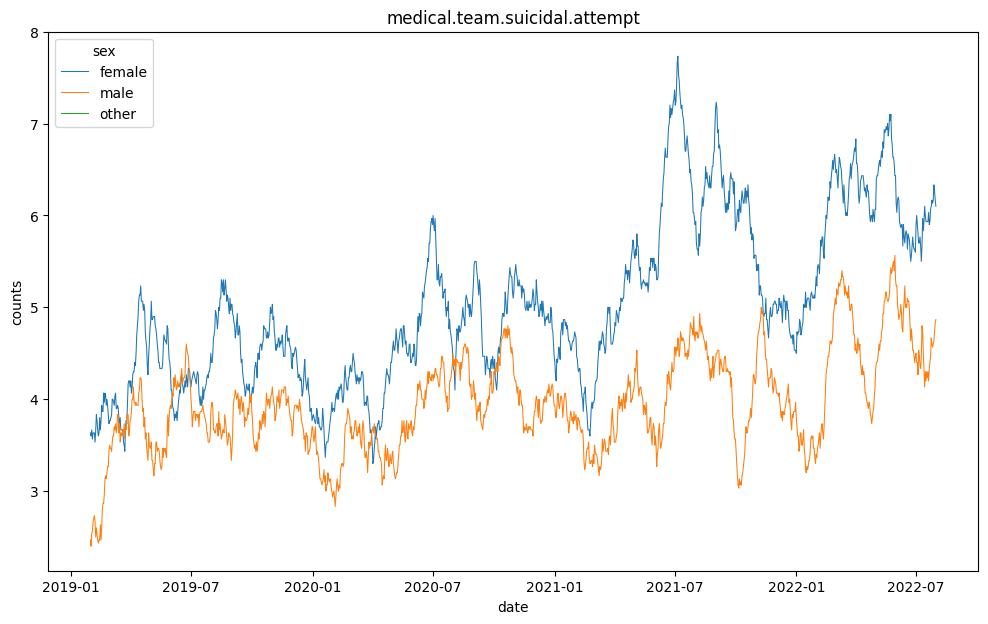

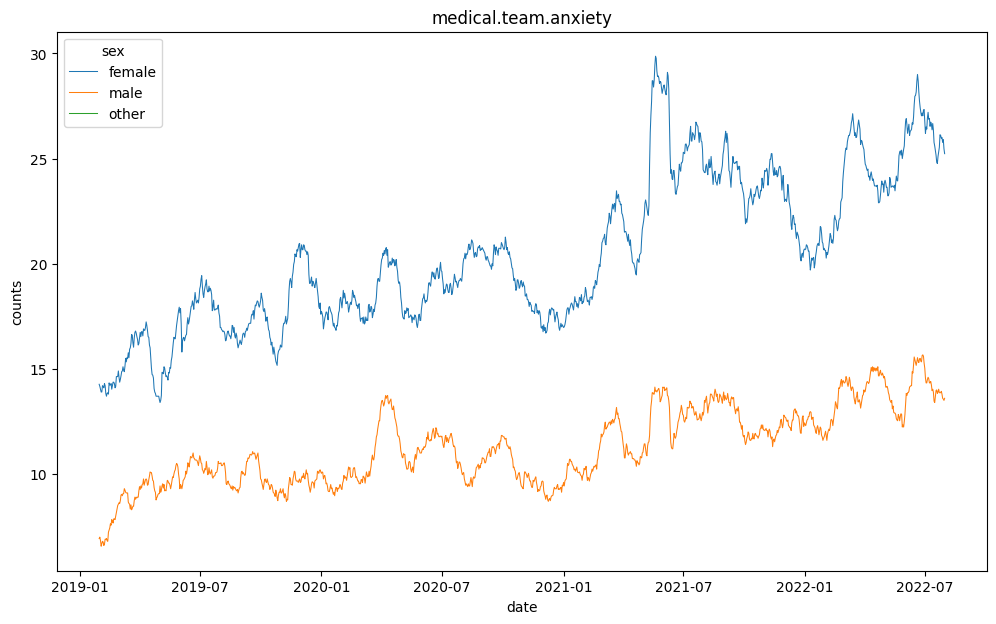

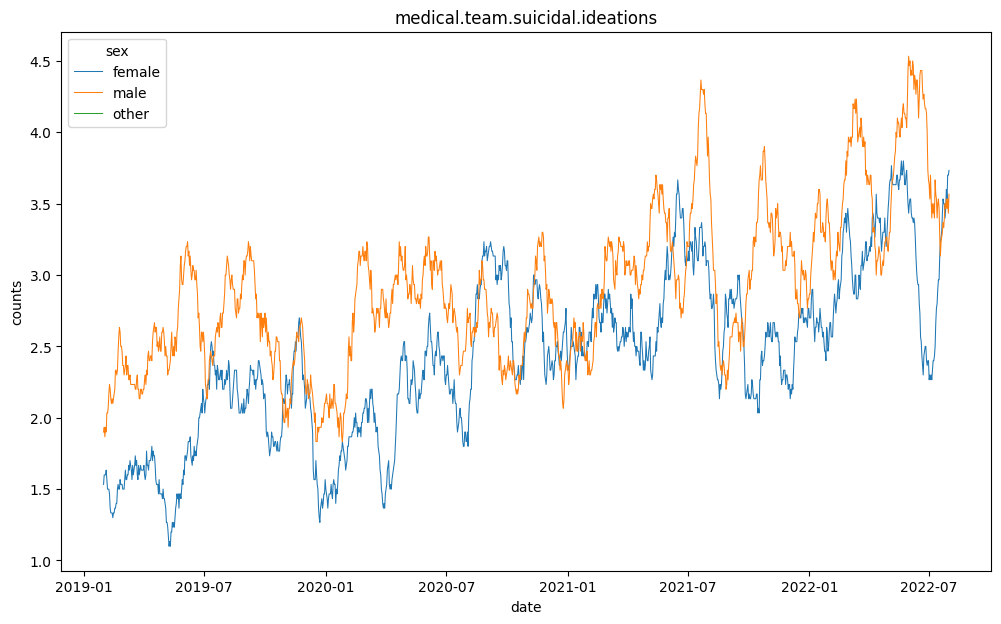

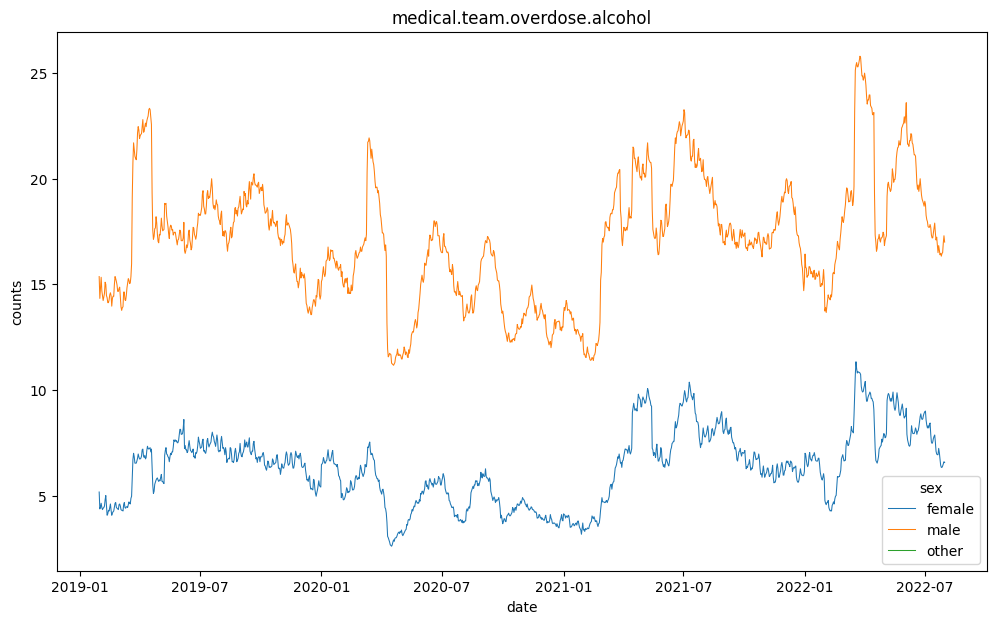

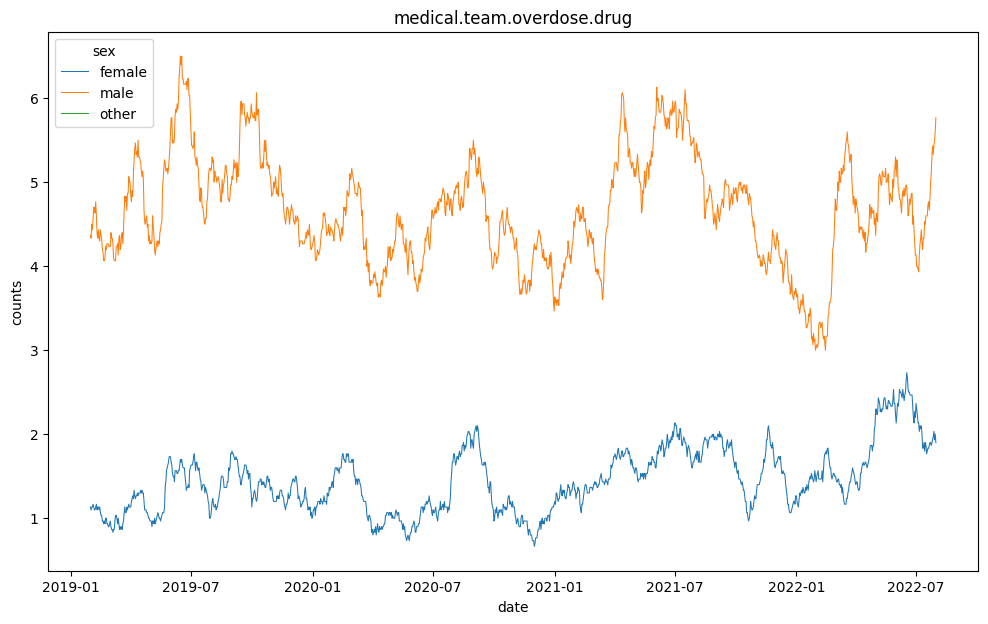

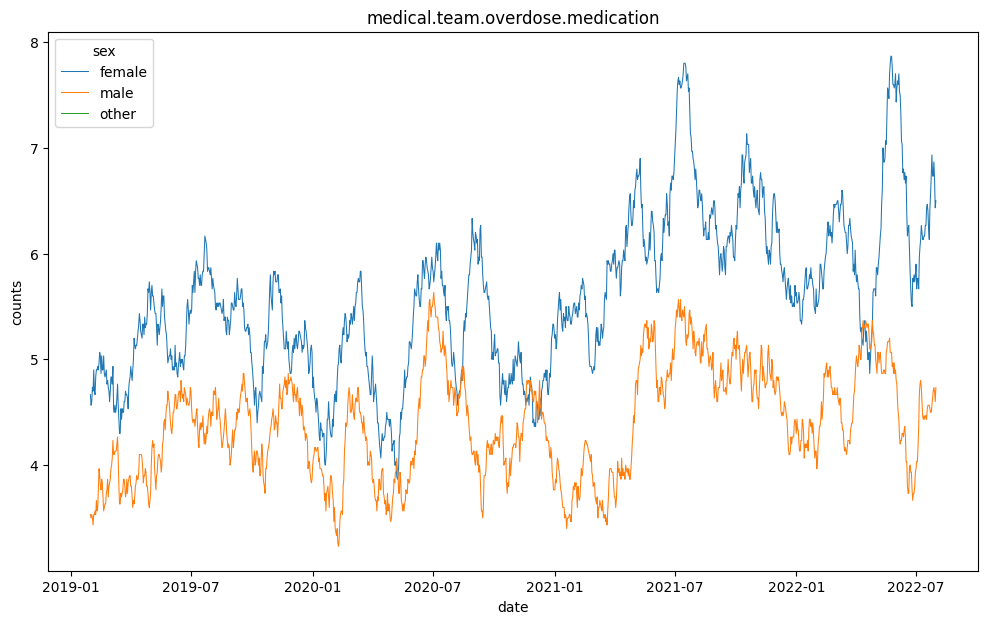

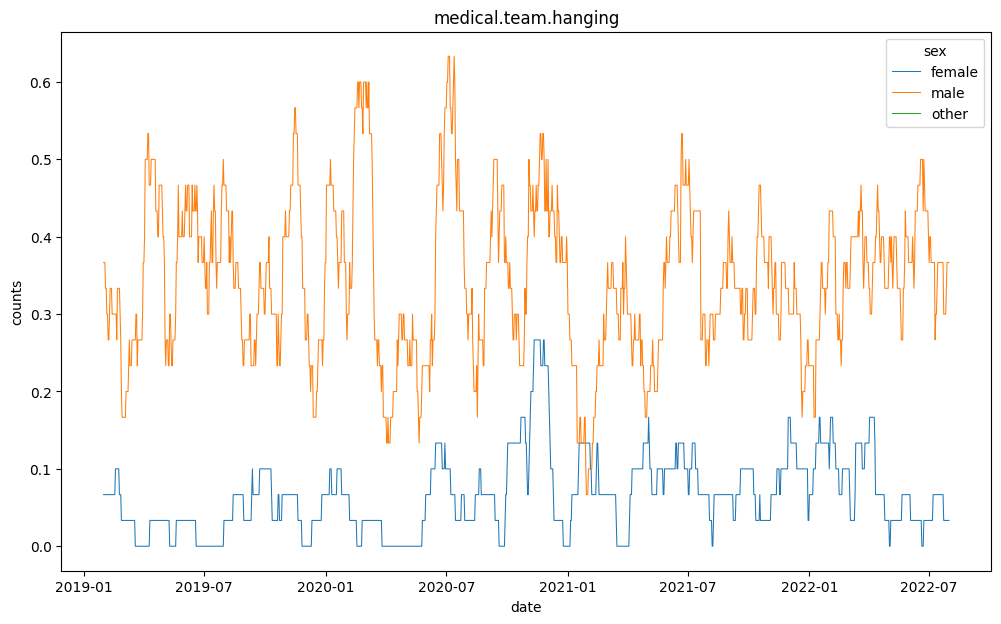

In [333]:
for emergency in emer_list:
    df1 = df[['datetime', 'sex', emergency]].copy()
    df1['date'] = df1['datetime'].apply(lambda x:x.date())
    pt_df = pd.pivot_table(df1, values=emergency, index='date', columns='sex', aggfunc=np.sum)
    pt_df.rolling(window=30).mean().plot(linewidth=0.75, figsize=(12,7), ylabel = 'counts', title=emergency)  

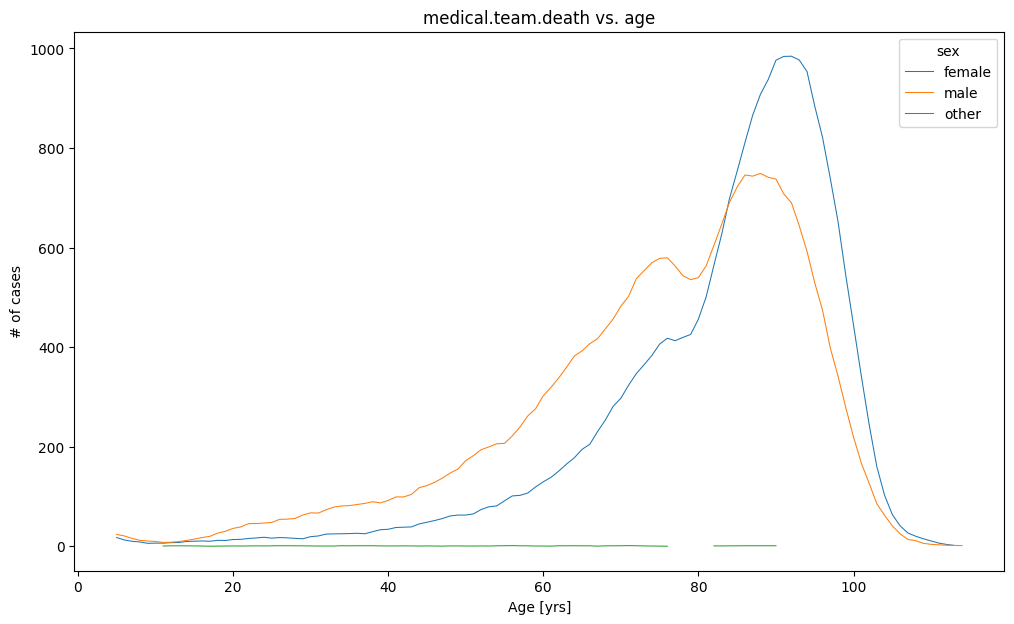

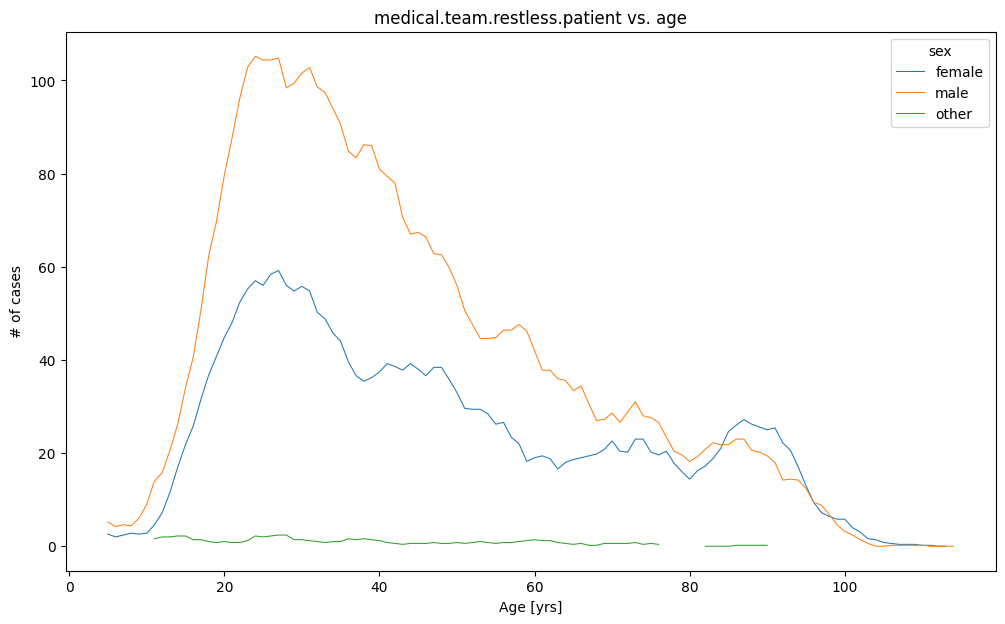

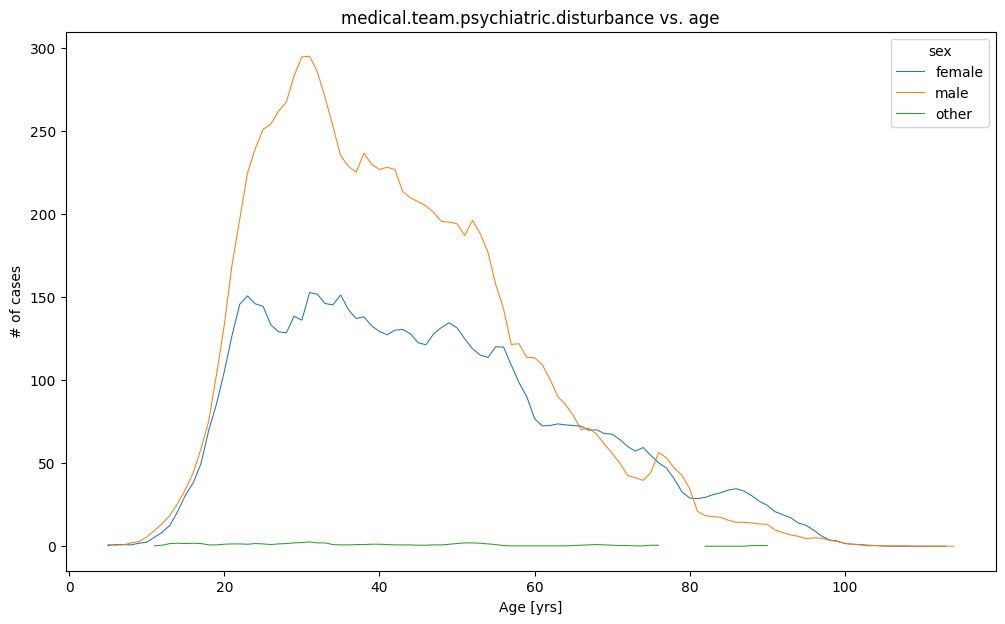

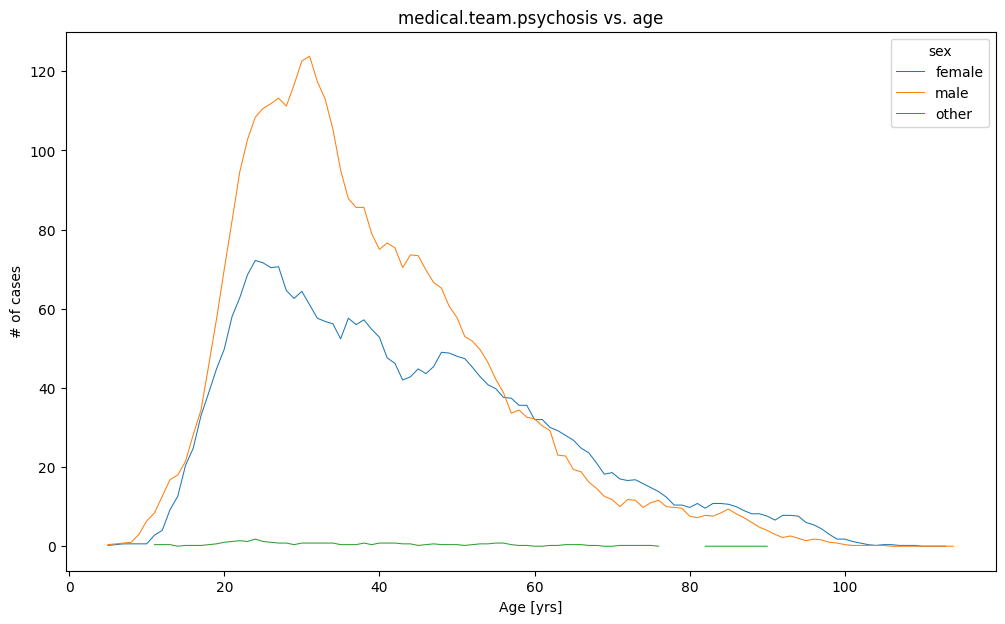

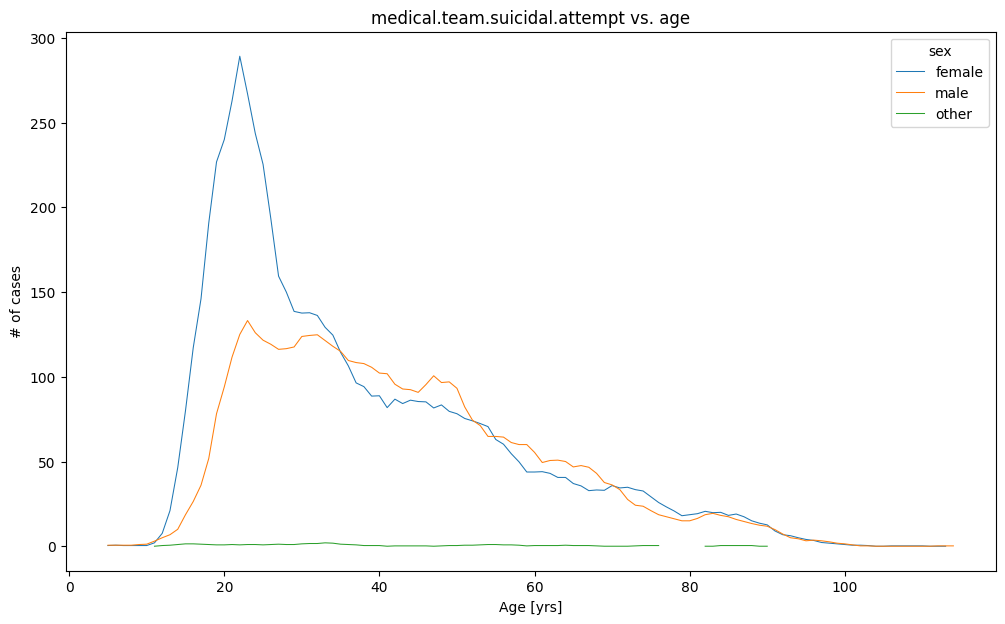

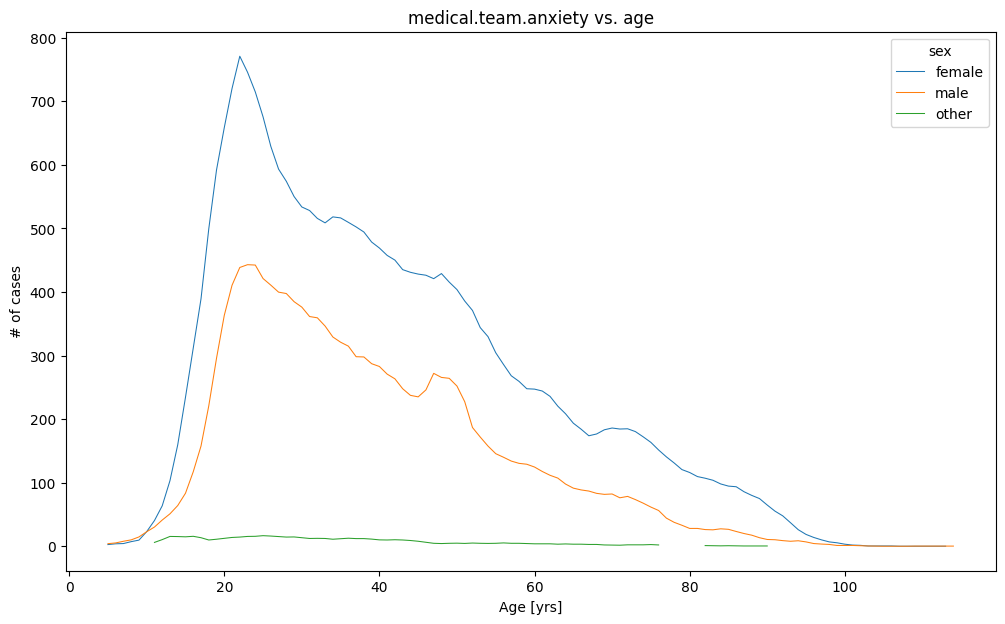

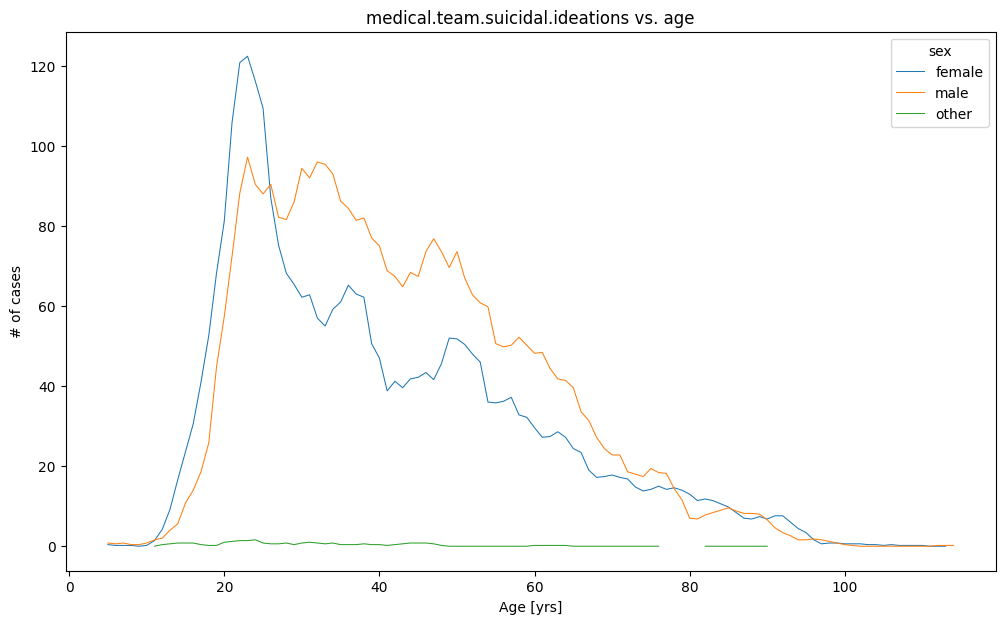

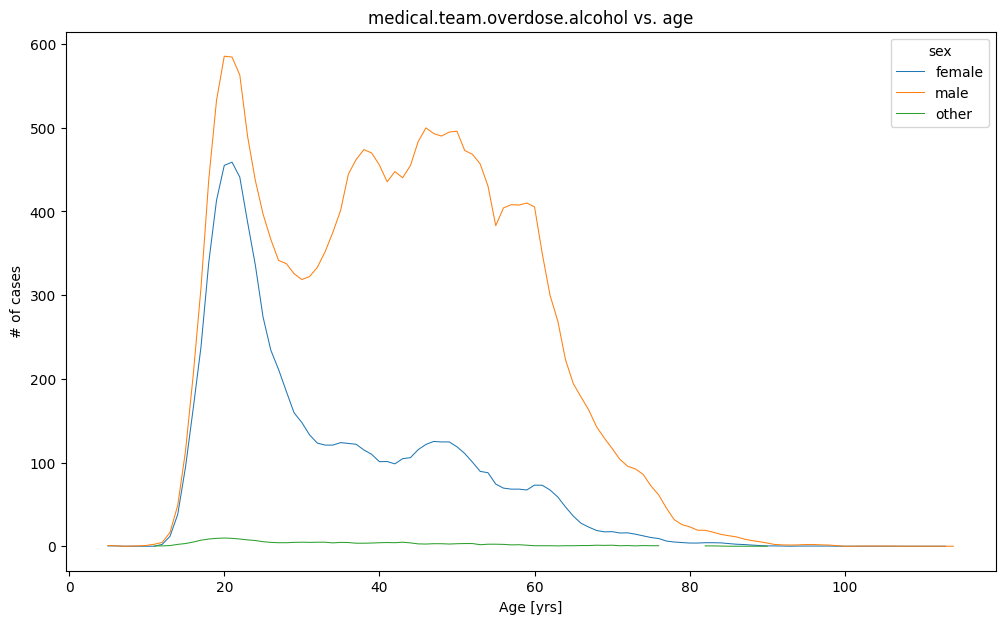

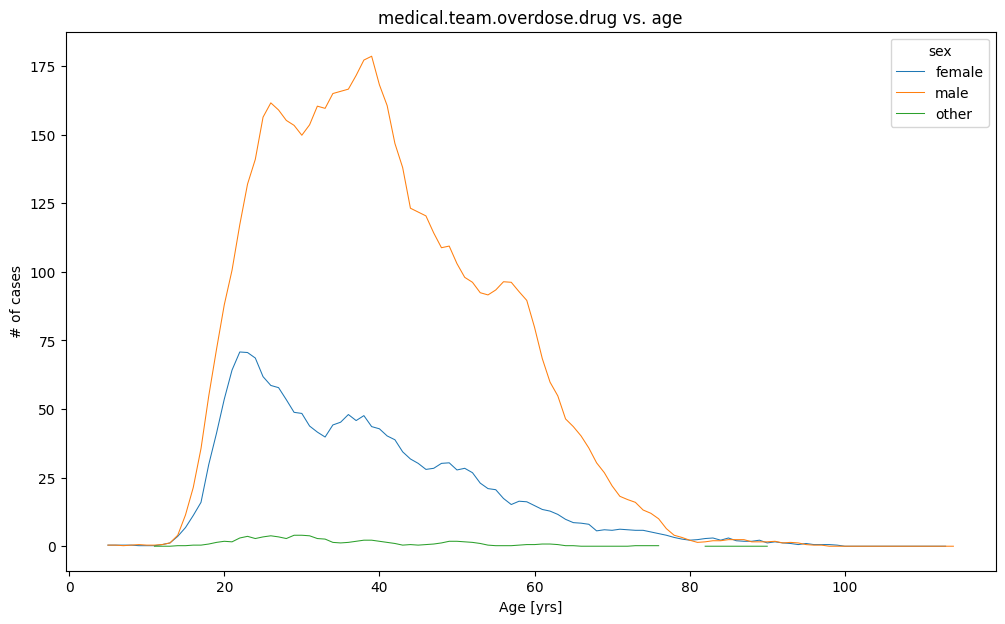

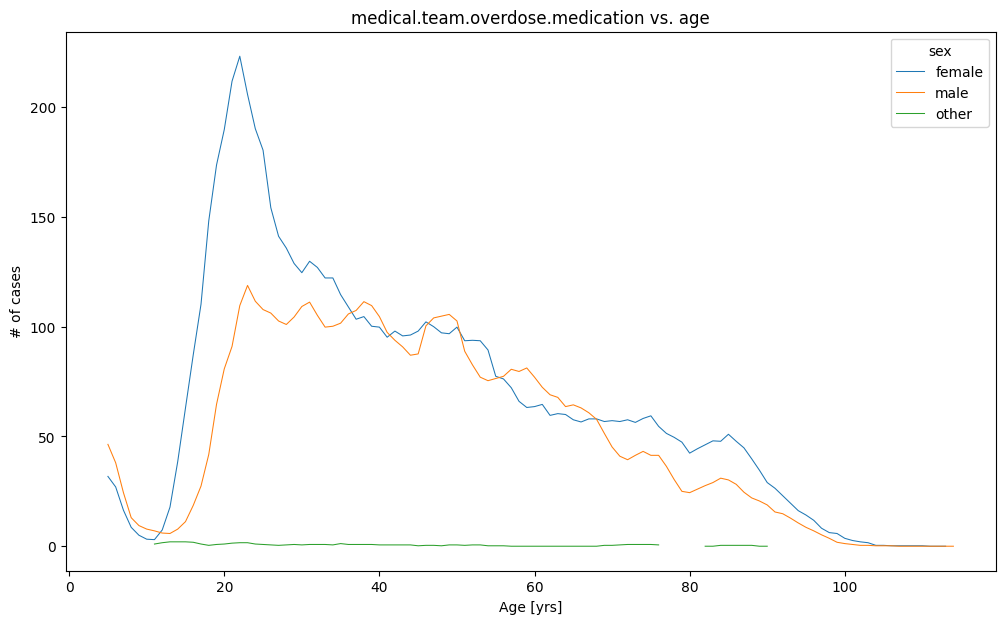

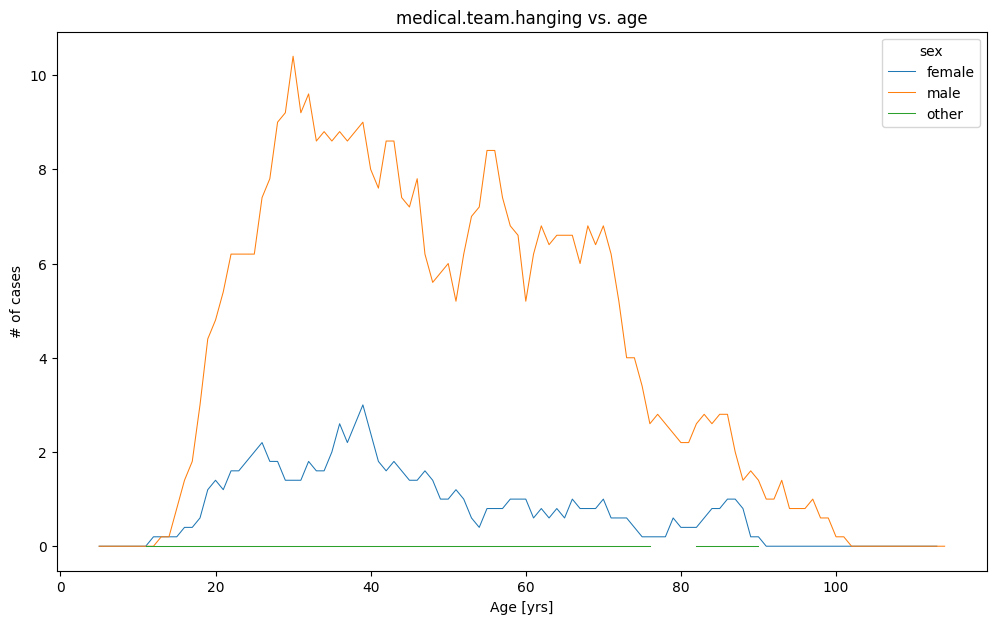

In [338]:
for emergency in emer_list:
    df1=df[['age', 'sex', emergency]].copy()
    df1['age']=round(df1['age'])
    #df1.groupby(['age']).count().plot(linewidth=0.75, figsize=(12,7))          
    pt_df = pd.pivot_table(df1, values=emergency, index='age', columns='sex', aggfunc=np.sum)
    #pt_df.plot(linewidth=0.75, figsize=(12,7), ylabel = 'counts', title=emergency)  
    pt_df.rolling(window=5).mean().plot(linewidth=0.75, figsize=(12,7), ylabel = 'counts', title=emergency)  
    plt.xlabel("Age [yrs]")
    plt.ylabel('# of cases')
    plt.title(emergency + ' vs. age')